### Python for Data Visualization

Install the necessary libraries

In [10]:
#pip install pandas

In [11]:
#pip install numpy

In [12]:
#pip install seaborn

In [13]:
#pip install matplotlib

In [15]:
# import the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Load the dataset
Data = pd.read_csv("Bike_Sales.CSV")

# View the first 10 rows of the dataset
Data.head(10)

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695.0,12/1/2021,1.0,December,2021.0,39.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
1,261696.0,12/1/2021,1.0,December,2021.0,44.0,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,"$1,266.00","$2,320.00","$1,054.00","$1,266.00","$2,320.00"
2,261697.0,12/2/2021,2.0,December,2021.0,37.0,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,$420.00,$769.00,$698.00,$840.00,"$1,538.00"
3,261698.0,12/2/2021,2.0,December,2021.0,31.0,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,$420.00,$769.00,$349.00,$420.00,$769.00
4,261699.0,12/3/2021,3.0,December,2021.0,37.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,"$1,252.00","$2,295.00","$2,086.00","$2,504.00","$4,590.00"
5,261700.0,12/3/2021,3.0,December,2021.0,24.0,Youth (<25),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1.0,"$1,252.00","$2,295.00","$1,043.00","$1,252.00","$2,295.00"
6,261701.0,12/3/2021,3.0,December,2021.0,37.0,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1.0,"$1,252.00","$2,295.00","$1,043.00","$1,252.00","$2,295.00"
7,261702.0,12/4/2021,4.0,December,2021.0,31.0,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",4.0,$420.00,$769.00,"$1,396.00","$1,680.00","$3,076.00"
8,261703.0,12/5/2021,5.0,December,2021.0,39.0,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"
9,261704.0,12/5/2021,5.0,December,2021.0,42.0,Adults (35-64),M,Germany,Nordrhein-Westfalen,Bikes,Mountain Bikes,"Mountain-200 Black, 38",4.0,"$1,252.00","$2,295.00","$4,172.00","$5,008.00","$9,180.00"



##### Steps in Exploratory Data Analysis ####

In [17]:
### A. Explore Data Structure ###
# View the columns and rows in the dataset
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales_Order #        88 non-null     float64
 1   Date                 88 non-null     object 
 2   Day                  88 non-null     float64
 3   Month                88 non-null     object 
 4   Year                 88 non-null     float64
 5   Customer_Age         88 non-null     float64
 6   Age_Group            88 non-null     object 
 7   Customer_Gender      88 non-null     object 
 8   Country              88 non-null     object 
 9   State                88 non-null     object 
 10  Product_Category     88 non-null     object 
 11  Sub_Category         88 non-null     object 
 12  Product_Description  88 non-null     object 
 13  Order_Quantity       88 non-null     float64
 14   Unit_Cost           88 non-null     object 
 15   Unit_Price          88 non-null     objec

In [18]:
# Shows number of rows and columns
print(Data.shape)

(89, 19)


In [26]:
# To view the data types of each variable/column
print(Data.dtypes)

Sales_Order #                 float64
Date                   datetime64[ns]
Day                           float64
Month                        category
Year                          float64
Customer_Age                  float64
Age_Group                    category
Customer_Gender              category
Country                      category
State                        category
Product_Category             category
Sub_Category                 category
Product_Description            object
Order_Quantity                float64
 Unit_Cost                     object
 Unit_Price                    object
 Profit                        object
 Cost                          object
Revenue                        object
dtype: object


In [30]:
# Convert categorical variables to category types (factor equivalent)
Data['Month'] = Data['Month'].astype('category')
Data['Age_Group'] = Data['Age_Group'].astype('category')
Data['Customer_Gender'] = Data['Customer_Gender'].astype('category')
Data['Country'] = Data['Country'].astype('category')
Data['State'] = Data['State'].astype('category')
Data['Product_Category'] = Data['Product_Category'].astype('category')
Data['Sub_Category'] = Data['Sub_Category'].astype('category')
# Convert Date column to datetime
Data['Date'] = pd.to_datetime(Data['Date'])

In [31]:
# Trim any whitespace from column names
Data.columns = Data.columns.str.strip()

# Convert Revenue and Profit to numeric
Data["Revenue"] = Data["Revenue"].replace("[,$]", "", regex=True).astype(float)
Data["Profit"] = Data["Profit"].replace("[,$]", "", regex=True).astype(float)

# Verify changes
print(Data[["Revenue", "Profit"]].head())


   Revenue  Profit
0   9180.0  4172.0
1   2320.0  1054.0
2   1538.0   698.0
3    769.0   349.0
4   4590.0  2086.0


##### Sales Trends Over Time (Revenue & Profit)

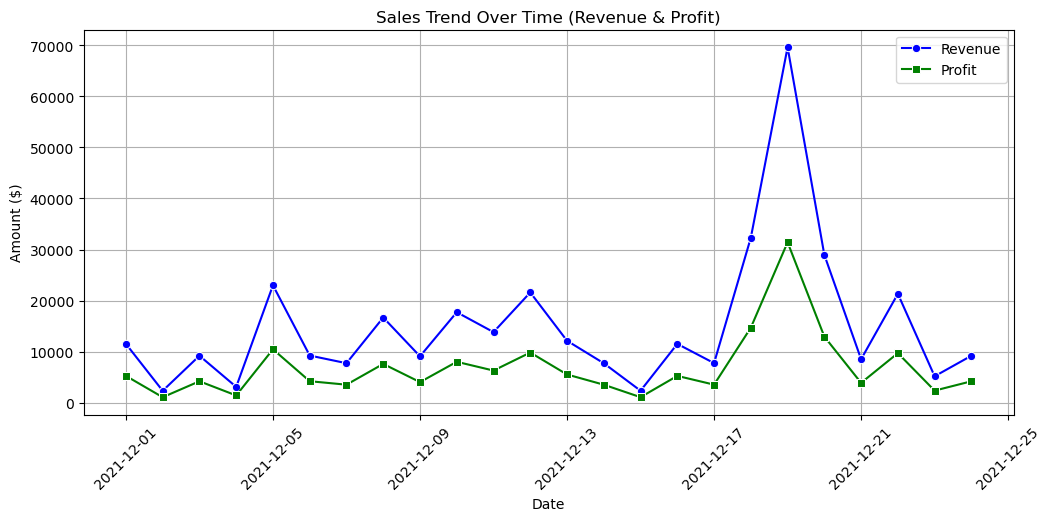

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Date
sales_trend = Data.groupby('Date')[['Revenue', 'Profit']].sum()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=sales_trend.index, y=sales_trend["Revenue"], label="Revenue", color="blue", marker="o")
sns.lineplot(x=sales_trend.index, y=sales_trend["Profit"], label="Profit", color="green", marker="s")

# Formatting
plt.title("Sales Trend Over Time (Revenue & Profit)")
plt.xlabel("Date")
plt.ylabel("Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

##### Customer Demographics (Age Group & Gender)

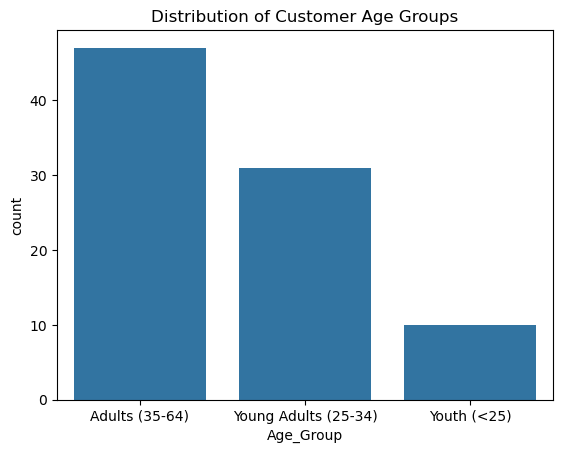

In [50]:
# Barplot for categorical variables like 'Age_Group'
sns.countplot(x='Age_Group', data=Data)
plt.title("Distribution of Customer Age Groups")
plt.show()

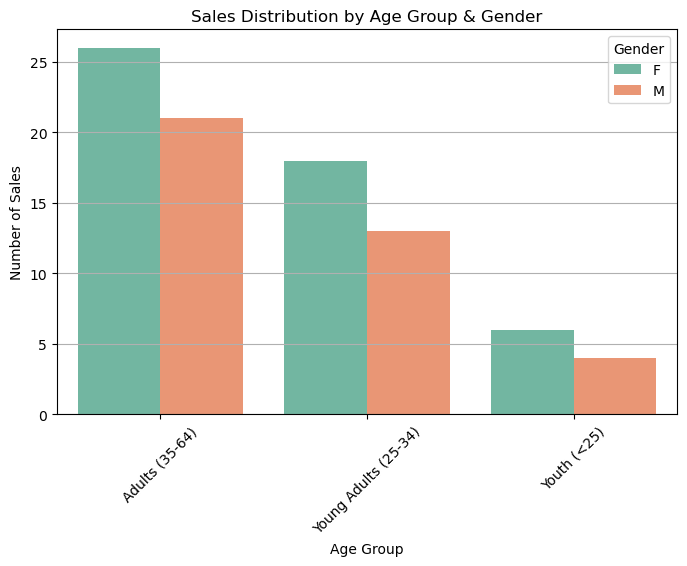

In [35]:
# Count sales per age group
plt.figure(figsize=(8, 5))
sns.countplot(data=Data, x="Age_Group", hue="Customer_Gender", palette="Set2")
plt.title("Sales Distribution by Age Group & Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis='y')
plt.show()


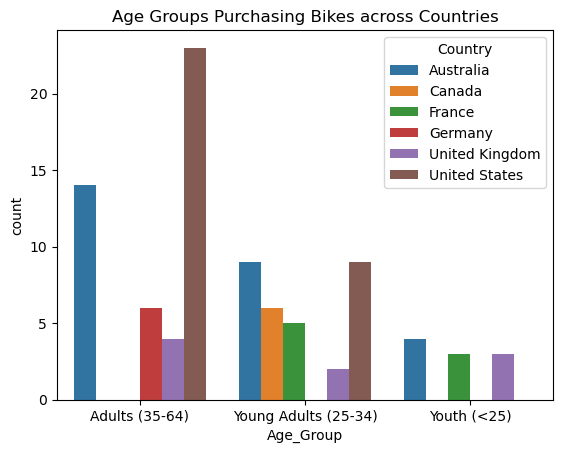

In [62]:
## 3. Relationships between categorical variables (Count graph)
sns.countplot(Data, x='Age_Group', hue='Country')
plt.title("Age Groups Purchasing Bikes across Countries")
plt.show()

##### Geographical Sales Analysis (Sales per Country)

In [79]:
#pip install plotly

In [70]:
import plotly.express as px

In [72]:
Data['Revenue'] = pd.to_numeric(Data['Revenue'], errors='coerce')

# Group by 'Country' and sum the revenue
country_sales = Data.groupby('Country')['Revenue'].sum().reset_index()

# Create a bar plot for Revenue per country
fig = px.bar(country_sales, x='Country', y='Revenue', 
             title='Revenue per Country',
             labels={'Revenue': 'Total Sales (USD)', 'Country': 'Country'},
             color='Revenue', color_continuous_scale='Viridis')

# Show the plot
fig.show()

C:\Users\EMMACULATE\AppData\Local\Temp\ipykernel_15108\2772604336.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



##### Exercise

Analyse the following using visuals

1. Top-Selling Categories
2. Profitability Analysis (Profit vs Order Quantity)

##### Thank you for listening